# Fashion MNIST classifier with Keras sequential API

### This code is part of Aurélien Géron Hands on Machine Learning... book with small changes

### Import basic libraries

In [40]:
import tensorflow as tf
from tensorflow import keras

### Get the dataset from keras.datasets and load into a variable

In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### Verify the size of the dataset and it's format

In [15]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


### Creating a validation dataset

In [16]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Check the result

In [17]:
print("For training")
print(X_train.shape)
print(y_train.shape)
print("For testing")
print(X_test.shape)
print(y_test.shape)
print("For validation")
print(X_valid.shape)
print(y_valid.shape)

For training
(55000, 28, 28)
(55000,)
For testing
(10000, 28, 28)
(10000,)
For validation
(5000, 28, 28)
(5000,)


### Creating the classifier architecture

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#model.add(keras.layers.InputLayer(input_shape=[28,28])) # Possible input layer  
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Converts the image into a unidimensional array
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### Printing the model summary:

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Plot of the model

In [97]:
import pydot
#import graphviz
keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### Visualizing some setail of the layers

In [71]:
print(model.layers)
hidden3 = model.layers[3]

[<tensorflow.python.keras.layers.core.Flatten object at 0x7f550807fd60>, <tensorflow.python.keras.layers.core.Dense object at 0x7f5516b55160>, <tensorflow.python.keras.layers.core.Dense object at 0x7f5516b55430>, <tensorflow.python.keras.layers.core.Dense object at 0x7f550b7014f0>]


In [75]:
weights, biases = hidden1.get_weights() # Note the random weights to break the simetry and help the backpropagation
print("Weights.shape:")
print(weights.shape)
print("Weights values:")
print(weights)
print("Biases.shape:")
print(biases.shape)
print("Weights values:")
print(biases)

Weights.shape:
(784, 300)
Weights values:
[[ 0.07233241  0.04318215  0.0585642  ... -0.00528681  0.03156736
   0.05152722]
 [-0.07306733 -0.07187591  0.0390579  ...  0.02374623 -0.03072542
   0.06913534]
 [-0.0172044   0.04622979 -0.01497742 ... -0.07065975  0.06158344
  -0.02926923]
 ...
 [ 0.02303063  0.01156563 -0.03764686 ... -0.03148396  0.05491033
   0.00530365]
 [ 0.01709151 -0.03672208 -0.01654372 ... -0.04532575 -0.03646802
  -0.02221081]
 [ 0.05101417 -0.06705742 -0.01646557 ...  0.02966785  0.02781228
   0.01758777]]
Biases.shape:
(300,)
Weights values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### Compiling the model

In [76]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", # sgd=stochastic gradient descent
             metrics=["accuracy"])

### Training the model

In [78]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7297 - accuracy: 0.7590 - val_loss: 0.5084 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4940 - accuracy: 0.8275 - val_loss: 0.4478 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4477 - accuracy: 0.8432 - val_loss: 0.4386 - val_accuracy: 0.8488
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4188 - accuracy: 0.8523 - val_loss: 0.4214 - val_accuracy: 0.8560
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3972 - accuracy: 0.8606 - val_loss: 0.3826 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8650 - val_loss: 0.3798 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3668 - accuracy: 0.8703 - val_loss: 0.3824 - val_accuracy:

### Visualizing the learning curves

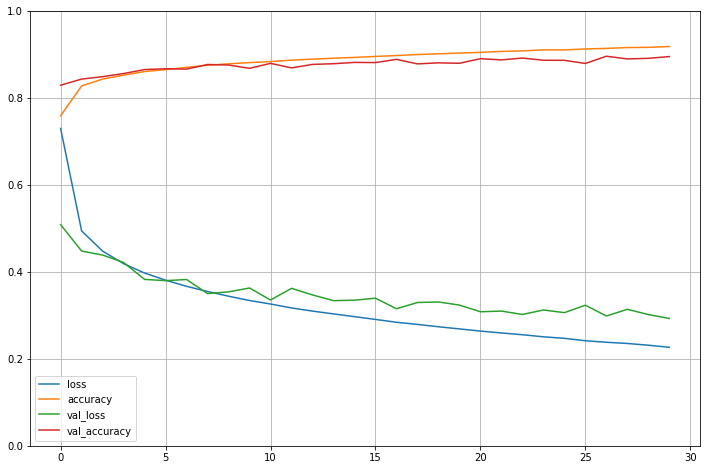

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluate the model

In [86]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 62.0885 - accuracy: 0.8504


[62.08845520019531, 0.8503999710083008]

### Using the model to make new predictions

In [101]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)